## PART 1

### Pre-processing

##### 整理資料並產生常態與亂數分配

In [1]:
column_data1 = ["A","7Up",7,100,200,500,1000]
column_data2 = ["B","Sprite",6,200,10,500,1000]
column_data3 = ["C","Pepsi",5,200,10,500,1000]
column_data4 = ["D","Coke",4,400,100,500,1000]
column_data5 = ["E","Cappuccino",3,800,10,1,500]
column_data6 = ["F","Espresso",2,800,10,1,500]
column_data7 = ["G","Latte",1,900,400,1,500]
count = [300,150,150,300,150,150,300]

In [2]:
import numpy as np
import pandas as pd
name=[column_data1,column_data2,column_data3,column_data4,column_data5,column_data6,column_data7]
for i in range(1,8):
    #資料常態分布
    normal_data = np.random.normal(name[i-1][3], name[i-1][4], count[i-1])
    #將範圍內的資料亂數分配
    random_data = np.random.randint(low=name[i-1][5],high=name[i-1][6],size=count[i-1])
    drink_list = [[0]*5 for i in range(count[i-1])]
    for j in range(count[i-1]):
        drink_list[j][0] = name[i-1][0]
        drink_list[j][1] = name[i-1][1]
        drink_list[j][2] = name[i-1][2]
        drink_list[j][3] = normal_data[j]
        drink_list[j][4] = random_data[j]
    if(i>=2):
        if(i>=3):
            drink = np.concatenate((drink, drink_list))
        else:
            drink = np.concatenate((drink1, drink_list))
    else:
        drink1 = drink_list
drink_df = pd.DataFrame(drink,columns=['Class','Drink','Rank','Amount','Quantity'])
drink_df
print(len(drink_df.index))

1500


In [3]:
drink_df1=drink_df
drink_df1

,Class,Drink,Rank,Amount,Quantity
0,A,7Up,7,354.95709928216,676
1,A,7Up,7,480.78451637240164,892
2,A,7Up,7,300.79456383033187,812
3,A,7Up,7,494.8658309263458,581
4,A,7Up,7,-240.62900049071902,965
...,...,...,...,...,...
1495,G,Latte,1,751.5184133531067,269
1496,G,Latte,1,580.0900028719791,15
1497,G,Latte,1,1167.1996695688795,495
1498,G,Latte,1,1139.901373950435,95


##### 對名目型屬性的資料做One-hot encoding

In [4]:
# 對 Class 進行 One-Hot Encoding
one_hot_encoded = pd.get_dummies(drink_df1['Class'])
# 合併原有的 DataFrame 和 One-Hot Encoding 結果
drink_df1 = pd.concat([drink_df1, one_hot_encoded], axis=1)
# 移除原有的 '類別' 欄位
drink_df1 = drink_df1.drop('Class', axis=1)

# 對 Drink 進行 One-Hot Encoding
one_hot_encoded = pd.get_dummies(drink_df1['Drink'])
# 合併原有的 DataFrame 和 One-Hot Encoding 結果
drink_df1 = pd.concat([drink_df1, one_hot_encoded], axis=1)
# 移除原有的 '類別' 欄位
drink_df1 = drink_df1.drop('Drink', axis=1)

drink_df1 

,Rank,Amount,Quantity,A,B,C,D,E,F,G,7Up,Cappuccino,Coke,Espresso,Latte,Pepsi,Sprite
0,7,354.95709928216,676,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,7,480.78451637240164,892,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,7,300.79456383033187,812,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,7,494.8658309263458,581,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,7,-240.62900049071902,965,1,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1,751.5184133531067,269,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1496,1,580.0900028719791,15,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1497,1,1167.1996695688795,495,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1498,1,1139.901373950435,95,0,0,0,0,0,0,1,0,0,0,0,1,0,0


##### 對數值型屬性資料做正規化(MinMaxScaler)

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1)).fit(drink_df1[["Amount"]])
X_scaled = scaler.transform(drink_df1[["Amount"]])
drink_df1["Amount"]=X_scaled
print(drink_df1)
scaler = MinMaxScaler(feature_range=(0, 1)).fit(drink_df1[["Quantity"]])
X_scaled = scaler.transform(drink_df1[["Quantity"]])
drink_df1["Quantity"]=X_scaled
print(drink_df1)
oneOfK_data = scaler.fit_transform(drink_df1)
oneOfK_data

     Rank    Amount Quantity  A  B  C  D  E  F  G  7Up  Cappuccino  Coke  \
0       7  0.372121      676  1  0  0  0  0  0  0    1           0     0   
1       7  0.424213      892  1  0  0  0  0  0  0    1           0     0   
2       7  0.349698      812  1  0  0  0  0  0  0    1           0     0   
3       7  0.430042      581  1  0  0  0  0  0  0    1           0     0   
4       7  0.125552      965  1  0  0  0  0  0  0    1           0     0   
...   ...       ...      ... .. .. .. .. .. .. ..  ...         ...   ...   
1495    1  0.536295      269  0  0  0  0  0  0  1    0           0     0   
1496    1  0.465325       15  0  0  0  0  0  0  1    0           0     0   
1497    1  0.708385      495  0  0  0  0  0  0  1    0           0     0   
1498    1  0.697083       95  0  0  0  0  0  0  1    0           0     0   
1499    1  0.483628      484  0  0  0  0  0  0  1    0           0     0   

      Espresso  Latte  Pepsi  Sprite  
0            0      0      0       0  
1        

array([[1.        , 0.37212097, 0.67703109, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.42421279, 0.89368104, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.34969799, 0.81344032, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.70838469, 0.49548646, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.69708335, 0.09428285, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.48362818, 0.48445336, ..., 1.        , 0.        ,
        0.        ]])

##### 使用t-SNE對Drink Dataset做降維

In [ ]:
# drink_df1 = drink_df1.drop('Rank', axis=1)
# print(drink_df1) 
# oneOfK_data = np.delete(oneOfK_data, [0], 1)
# print(oneOfK_data)

In [12]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

oneOfK_data1 = TSNE(n_components=2, learning_rate='auto',init='random', random_state=0,verbose=1).fit_transform(oneOfK_data)
oneOfK_data1

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1500 samples in 0.001s...
[t-SNE] Computed neighbors for 1500 samples in 0.117s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1500
[t-SNE] Computed conditional probabilities for sample 1500 / 1500
[t-SNE] Mean sigma: 0.038506
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.924820
[t-SNE] KL divergence after 1000 iterations: 0.304238


array([[-17.431124 ,  -6.396976 ],
       [-14.271133 ,  10.663602 ],
       [-16.510439 ,   6.5473166],
       ...,
       [  9.171889 , -27.0478   ],
       [  2.4431078, -15.306989 ],
       [ 16.32179  , -22.621742 ]], dtype=float32)

In [13]:
import plotly.graph_objs as go
import plotly
oneOfK_data_x = []
oneOfK_data_y = []
for i in oneOfK_data1: #看用X_tsne 還是 oneOfK_data,應該要一樣
    oneOfK_data_x.append(i[0])
    oneOfK_data_y.append(i[1])
trace0 = go.Scatter(
    x = oneOfK_data_x[:300],
    y = oneOfK_data_y[:300],
    mode = 'markers',
    name = '7Up'
)
trace1 = go.Scatter(
    x = oneOfK_data_x[300:450],
    y = oneOfK_data_y[300:450],
    mode = 'markers',
    name = 'Sprite'
)
trace2 = go.Scatter(
    x = oneOfK_data_x[450:600],
    y = oneOfK_data_y[450:600],
    mode = 'markers',
    name = 'Pepsi'
)
trace3 = go.Scatter(
    x = oneOfK_data_x[600:900],
    y = oneOfK_data_y[600:900],
    mode = 'markers',
    name = 'Coke'
)
trace4 = go.Scatter(
    x = oneOfK_data_x[900:1050],
    y = oneOfK_data_y[900:1050],
    mode = 'markers',
    name = 'Cappuccino'
)
trace5 = go.Scatter(
    x = oneOfK_data_x[1050:1200],
    y = oneOfK_data_y[1050:1200],
    mode = 'markers',
    name = 'Espresso'
)
trace6 = go.Scatter(
    x = oneOfK_data_x[1200:1500],
    y = oneOfK_data_y[1200:1500],
    mode = 'markers',
    name = 'Latte'
)

data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]
plotly.offline.iplot(data, filename='scatter1')

In [8]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

oneOfK_data11 = TSNE(n_components=2, learning_rate='auto',init='pca', random_state=0,n_iter=100000,verbose=1).fit_transform(oneOfK_data)
oneOfK_data11

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1500 samples in 0.002s...
[t-SNE] Computed neighbors for 1500 samples in 0.113s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1500
[t-SNE] Computed conditional probabilities for sample 1500 / 1500
[t-SNE] Mean sigma: 0.038506


c:\Users\user\anaconda3\envs\myenv\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.630939
[t-SNE] KL divergence after 12900 iterations: 0.257313


array([[-34.238373, -40.55831 ],
       [-47.411533, -30.218067],
       [-43.51449 , -34.156353],
       ...,
       [ 71.670425,  -7.315499],
       [ 84.77884 , -14.886266],
       [ 67.08964 , -15.908617]], dtype=float32)

In [9]:
import plotly.graph_objs as go
import plotly
oneOfK_data_x = []
oneOfK_data_y = []
for i in oneOfK_data11: #看用X_tsne 還是 oneOfK_data,應該要一樣
    oneOfK_data_x.append(i[0])
    oneOfK_data_y.append(i[1])
trace0 = go.Scatter(
    x = oneOfK_data_x[:300],
    y = oneOfK_data_y[:300],
    mode = 'markers',
    name = '7Up'
)
trace1 = go.Scatter(
    x = oneOfK_data_x[300:450],
    y = oneOfK_data_y[300:450],
    mode = 'markers',
    name = 'Sprite'
)
trace2 = go.Scatter(
    x = oneOfK_data_x[450:600],
    y = oneOfK_data_y[450:600],
    mode = 'markers',
    name = 'Pepsi'
)
trace3 = go.Scatter(
    x = oneOfK_data_x[600:900],
    y = oneOfK_data_y[600:900],
    mode = 'markers',
    name = 'Coke'
)
trace4 = go.Scatter(
    x = oneOfK_data_x[900:1050],
    y = oneOfK_data_y[900:1050],
    mode = 'markers',
    name = 'Cappuccino'
)
trace5 = go.Scatter(
    x = oneOfK_data_x[1050:1200],
    y = oneOfK_data_y[1050:1200],
    mode = 'markers',
    name = 'Espresso'
)
trace6 = go.Scatter(
    x = oneOfK_data_x[1200:1500],
    y = oneOfK_data_y[1200:1500],
    mode = 'markers',
    name = 'Latte'
)

data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]
plotly.offline.iplot(data, filename='scatter1')

In [16]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

oneOfK_data10 = TSNE(n_components=2, learning_rate='auto',init='pca', random_state=0,perplexity=100,verbose=1).fit_transform(oneOfK_data)
oneOfK_data10

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 1500 samples in 0.001s...
[t-SNE] Computed neighbors for 1500 samples in 0.158s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1500
[t-SNE] Computed conditional probabilities for sample 1500 / 1500
[t-SNE] Mean sigma: 0.103987


c:\Users\user\anaconda3\envs\myenv\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



[t-SNE] KL divergence after 250 iterations with early exaggeration: 40.819210
[t-SNE] KL divergence after 1000 iterations: 0.120200


array([[-16.984835 , -11.8205   ],
       [-11.108583 , -10.757464 ],
       [-14.029265 , -10.351873 ],
       ...,
       [ 20.064837 , -10.447919 ],
       [ 15.634783 ,  -7.381602 ],
       [ 21.68709  ,  -7.8151164]], dtype=float32)

In [17]:
import plotly.graph_objs as go
import plotly
oneOfK_data_x = []
oneOfK_data_y = []
for i in oneOfK_data10: #看用X_tsne 還是 oneOfK_data,應該要一樣
    oneOfK_data_x.append(i[0])
    oneOfK_data_y.append(i[1])
trace0 = go.Scatter(
    x = oneOfK_data_x[:300],
    y = oneOfK_data_y[:300],
    mode = 'markers',
    name = '7Up'
)
trace1 = go.Scatter(
    x = oneOfK_data_x[300:450],
    y = oneOfK_data_y[300:450],
    mode = 'markers',
    name = 'Sprite'
)
trace2 = go.Scatter(
    x = oneOfK_data_x[450:600],
    y = oneOfK_data_y[450:600],
    mode = 'markers',
    name = 'Pepsi'
)
trace3 = go.Scatter(
    x = oneOfK_data_x[600:900],
    y = oneOfK_data_y[600:900],
    mode = 'markers',
    name = 'Coke'
)
trace4 = go.Scatter(
    x = oneOfK_data_x[900:1050],
    y = oneOfK_data_y[900:1050],
    mode = 'markers',
    name = 'Cappuccino'
)
trace5 = go.Scatter(
    x = oneOfK_data_x[1050:1200],
    y = oneOfK_data_y[1050:1200],
    mode = 'markers',
    name = 'Espresso'
)
trace6 = go.Scatter(
    x = oneOfK_data_x[1200:1500],
    y = oneOfK_data_y[1200:1500],
    mode = 'markers',
    name = 'Latte'
)

data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]
plotly.offline.iplot(data, filename='scatter1')

In [18]:
X_tsne = TSNE(n_components=2,learning_rate='auto', init='random', random_state=20, verbose=1).fit_transform(oneOfK_data)
X_tsne

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1500 samples in 0.001s...
[t-SNE] Computed neighbors for 1500 samples in 0.122s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1500
[t-SNE] Computed conditional probabilities for sample 1500 / 1500
[t-SNE] Mean sigma: 0.038506
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.887779
[t-SNE] KL divergence after 1000 iterations: 0.295042


array([[ -8.363345  ,  38.10452   ],
       [  3.5611093 ,  29.03496   ],
       [ -0.11729436,  32.455276  ],
       ...,
       [ 14.882844  , -26.8647    ],
       [  1.7506455 , -24.470625  ],
       [ 13.167461  , -35.335106  ]], dtype=float32)

In [19]:
import plotly.graph_objs as go
import plotly
oneOfK_data_x = []
oneOfK_data_y = []
for i in X_tsne: #看用X_tsne 還是 oneOfK_data,應該要一樣
    oneOfK_data_x.append(i[0])
    oneOfK_data_y.append(i[1])
trace0 = go.Scatter(
    x = oneOfK_data_x[:300],
    y = oneOfK_data_y[:300],
    mode = 'markers',
    name = '7Up'
)
trace1 = go.Scatter(
    x = oneOfK_data_x[300:450],
    y = oneOfK_data_y[300:450],
    mode = 'markers',
    name = 'Sprite'
)
trace2 = go.Scatter(
    x = oneOfK_data_x[450:600],
    y = oneOfK_data_y[450:600],
    mode = 'markers',
    name = 'Pepsi'
)
trace3 = go.Scatter(
    x = oneOfK_data_x[600:900],
    y = oneOfK_data_y[600:900],
    mode = 'markers',
    name = 'Coke'
)
trace4 = go.Scatter(
    x = oneOfK_data_x[900:1050],
    y = oneOfK_data_y[900:1050],
    mode = 'markers',
    name = 'Cappuccino'
)
trace5 = go.Scatter(
    x = oneOfK_data_x[1050:1200],
    y = oneOfK_data_y[1050:1200],
    mode = 'markers',
    name = 'Espresso'
)
trace6 = go.Scatter(
    x = oneOfK_data_x[1200:1500],
    y = oneOfK_data_y[1200:1500],
    mode = 'markers',
    name = 'Latte'
)

data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]
plotly.offline.iplot(data, filename='scatter1')

#### 使用MDS降維

In [37]:
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
mds = MDS(n_components=2)
# Get the embeddings
X_transform_2d = mds.fit_transform(drink_df1)
X_transform_2d

array([[-1.02245063, -3.15993243],
       [-1.22441764, -3.10950628],
       [-1.13023428, -3.13806373],
       ...,
       [ 2.14905441,  2.55335462],
       [ 1.95191165,  2.7584221 ],
       [ 2.1450115 ,  2.52386336]])

After training: (1500, 2)


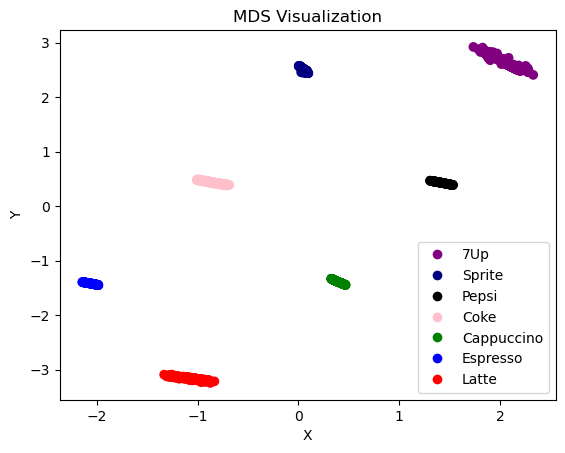

In [41]:
# 提取數值資料
# data = drink_df1.values
labels = drink_df1["Rank"].values
# print("Before training:",data.shape)
# 使用 t-SNE 將資料降維至 2D
print("After training:",X_transform_2d.shape)
# 定義不同類別對應的顏色
colors = {'7': 'red', '6': 'blue', '5': 'green','4': 'pink','3': 'black', '2': 'navy','1': 'purple'}
label_name = ['7Up', 'Sprite', 'Pepsi', 'Coke', 'Cappuccino', 'Espresso', 'Latte']
# 將降維後的資料轉換為 DataFrame
df_2d = pd.DataFrame(X_transform_2d, columns=['X', 'Y'])

# 繪製 t-SNE 的結果
plt.scatter(df_2d['X'], df_2d['Y'], c=[colors[num] for num in labels])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('MDS Visualization')
# 設定圖例
legend_elements = []
for i, label in enumerate(label_name):
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=colors[str(i+1)], markersize=8))

plt.legend(handles=legend_elements, loc='lower right')
plt.show()


------------------------------------------------------------

## PART 2

#### 對名目尺度欄位Drink使用Word2Vec

In [21]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec 
import gensim.downloader
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [22]:
#使用Google News資料集所訓練的權重
vectors = gensim.downloader.load('word2vec-google-news-300')
from gensim.test.utils import common_texts
from gensim.models import Word2Vec 
vectors.most_similar('Latte')
# drink_text = [['7Up'],['Sprite'],['Pepsi'],['Coke'],['Cappuccino'],['Espresso'],['Latte']]
# model = Word2Vec(sentences=drink_text, vector_size=50, window=1,workers=4)
vectors.save("word2vec.model")

In [23]:
from gensim.models import KeyedVectors
import numpy as np

# 加载预训练的词嵌入模型
# vectors = KeyedVectors.load_word2vec_format('word2vec.model', binary=True)

# 饮品列表
drink_text = [['7Up'],['Sprite'],['Pepsi'],['Coke'],['Cappuccino'],['Espresso'],['Latte']]

# 获取饮品的词嵌入向量
drink_vectors = [vectors[word[0]] for word in drink_text]
print('飲品的詞嵌入:',drink_vectors)
# 计算距离矩阵
num_words = len(drink_vectors)
distance_matrix = np.zeros((num_words, num_words))

for i in range(num_words):
    for j in range(num_words):
        distance_matrix[i, j] = 1 - np.dot(drink_vectors[i], drink_vectors[j]) / (np.linalg.norm(drink_vectors[i]) * np.linalg.norm(drink_vectors[j]))

# 打印距离矩阵
print(distance_matrix)

飲品的詞嵌入: [array([ 0.01165771, -0.02636719, -0.12451172, -0.0177002 ,  0.16015625,
       -0.2734375 ,  0.20214844, -0.05273438,  0.00787354,  0.01428223,
        0.02880859,  0.14257812, -0.04272461,  0.07568359, -0.21191406,
        0.28320312, -0.05810547,  0.16894531,  0.07910156, -0.05981445,
        0.05371094,  0.3671875 ,  0.0859375 ,  0.02587891, -0.05224609,
       -0.00294495,  0.07128906,  0.13183594,  0.10693359,  0.09716797,
       -0.05249023, -0.20898438,  0.28125   ,  0.4765625 , -0.09521484,
       -0.11669922,  0.03808594,  0.08154297,  0.26757812,  0.16113281,
        0.04541016, -0.19042969,  0.28125   ,  0.41015625, -0.27734375,
       -0.12402344, -0.22167969,  0.10791016,  0.52734375, -0.04370117,
       -0.30664062, -0.17480469,  0.07519531,  0.08300781,  0.05053711,
       -0.18066406,  0.15136719, -0.16699219, -0.02404785,  0.01953125,
       -0.15234375,  0.20605469, -0.1484375 , -0.0168457 ,  0.0480957 ,
       -0.21777344,  0.09228516, -0.05493164,  0.083496

#### t-SNE降維

In [24]:
from sklearn.manifold import TSNE
data = TSNE(n_components=2, learning_rate='auto',init='pca', random_state=0,verbose=1,perplexity=1).fit_transform(distance_matrix)
data

[t-SNE] Computing 4 nearest neighbors...
[t-SNE] Indexed 7 samples in 0.011s...
[t-SNE] Computed neighbors for 7 samples in 0.231s...
[t-SNE] Computed conditional probabilities for sample 7 / 7
[t-SNE] Mean sigma: 0.068960
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.199165


c:\Users\user\anaconda3\envs\myenv\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



[t-SNE] KL divergence after 1000 iterations: 0.140981


array([[ 84.46844 ,  -9.03516 ],
       [ 75.90779 ,  -6.933488],
       [ 60.448624,  -3.139025],
       [ 66.2392  ,  -4.559635],
       [-73.816376, 225.70358 ],
       [-80.25094 , 219.28185 ],
       [-84.462074, 215.0825  ]], dtype=float32)

After training: (7, 2)
           X           Y
0  84.468437   -9.035160
1  75.907791   -6.933488
2  60.448624   -3.139025
3  66.239197   -4.559635
4 -73.816376  225.703583
5 -80.250938  219.281845
6 -84.462074  215.082504


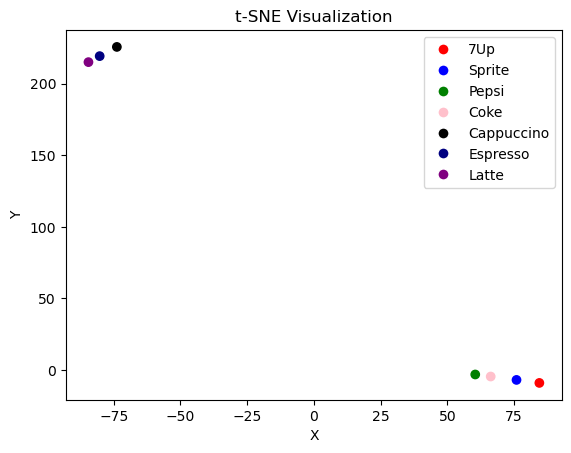

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# 提取數值資料
# data = drink_df1.values
# labels = drink_df1["Rank"].values
# print("Before training:", data.shape)

# 使用 t-SNE 將資料降維至 2D
print("After training:", data.shape)

# 定義不同類別對應的顏色
colors = ['red', 'blue', 'green', 'pink', 'black', 'navy', 'purple']
label_name = ['7Up', 'Sprite', 'Pepsi', 'Coke', 'Cappuccino', 'Espresso', 'Latte']

# 將降維後的資料轉換為 DataFrame
df_2d = pd.DataFrame(data, columns=['X', 'Y'])
print(df_2d)

# 繪製 t-SNE 的結果
scatter = plt.scatter(df_2d['X'], df_2d['Y'], c=[colors[num] for num in range(len(data))])

plt.xlabel('X')
plt.ylabel('Y')
plt.title('t-SNE Visualization')

# 設定圖例
legend_elements = []
for i, label in enumerate(label_name):
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=colors[i], markersize=8))

plt.legend(handles=legend_elements, loc='upper right')
plt.show()


#### MDS降維

In [42]:
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
mds = MDS(n_components=2, dissimilarity='precomputed')
mds_data = mds.fit_transform(distance_matrix)
mds_data

array([[-0.19153536, -0.3531887 ],
       [ 0.11028735, -0.16613226],
       [ 0.18858402, -0.44781831],
       [ 0.39116494, -0.15959347],
       [-0.48277772,  0.2120313 ],
       [-0.15836783,  0.48408077],
       [ 0.14264461,  0.43062067]])

After training: (7, 2)
          X         Y
0 -0.191535 -0.353189
1  0.110287 -0.166132
2  0.188584 -0.447818
3  0.391165 -0.159593
4 -0.482778  0.212031
5 -0.158368  0.484081
6  0.142645  0.430621


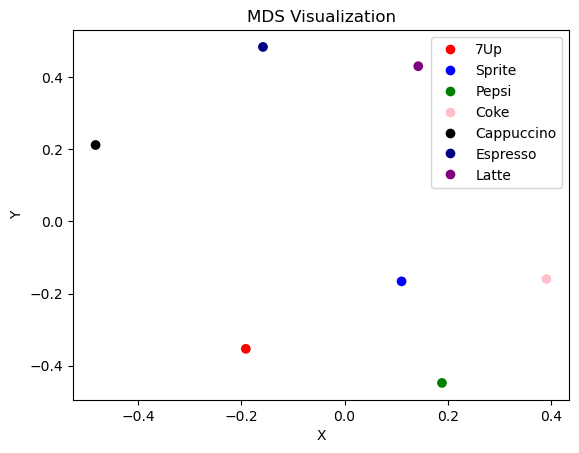

In [43]:
import pandas as pd
# 提取數值資料
# data = drink_df1.values
# labels = drink_df1["Rank"].values
# print("Before training:",data.shape)
# 使用 t-SNE 將資料降維至 2D
print("After training:",mds_data.shape)
# 定義不同類別對應的顏色
colors = ['red','blue','green','pink','black', 'navy','purple']
label_name = ['7Up','Sprite','Pepsi','Coke','Cappuccino','Espresso','Latte']
# 將降維後的資料轉換為 DataFrame
df_2d = pd.DataFrame(mds_data, columns=['X', 'Y'])
print(df_2d)
# 繪製 t-SNE 的結果
# for i,label in enumerate(label_name):
#     plt.text(df_2d['X'][i], df_2d['Y'][i],label,fontsize=10)
plt.scatter(df_2d['X'], df_2d['Y'],c=[colors[num] for num in range(len(mds_data))])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('MDS Visualization')
# 設定圖例
legend_elements = []
for i, label in enumerate(label_name):
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=colors[i], markersize=8))

plt.legend(handles=legend_elements, loc='upper right')
plt.show()

